# HOG (Histogram oriented Gradient)

## HISTOGRAM

An image histogram is a type of histogram that acts as a graphical representation of the tonal distribution in a digital image. It plots the number of pixels for each tonal value. By looking at the histogram for a specific image a viewer will be able to judge the entire tonal distribution at a glance.
>Representats intensity of each color in image.

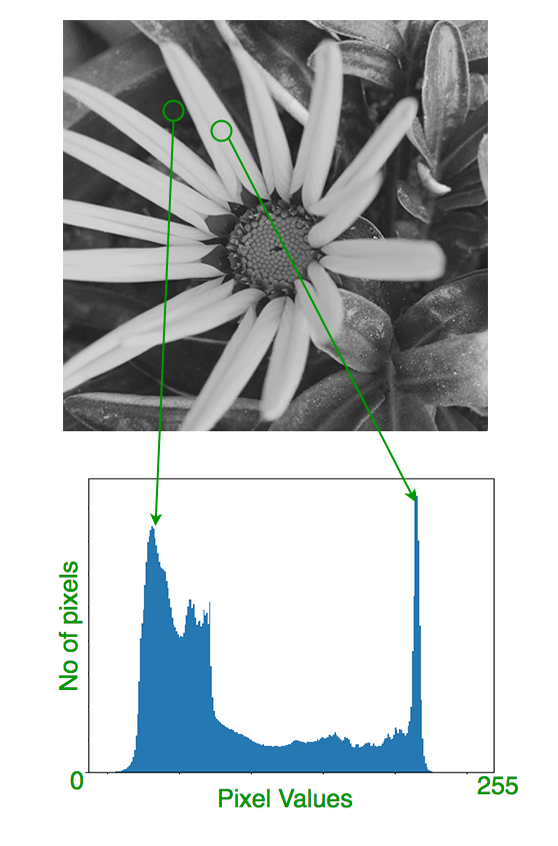

In [12]:
#import all the libraries
#%matplotlib inline
import cv2
import numpy as np
from matplotlib import pyplot as plt

Load the image, and convert to grayscale

In [14]:
img=cv2.imread("demo.jpg", 0)

Show the Image

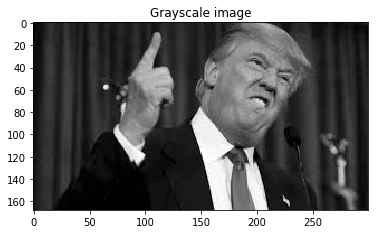

In [15]:
plt.title("Grayscale image")
plt.imshow(img, cmap='gray')

The graph below represents the intensity of all the pixel values (0-255)

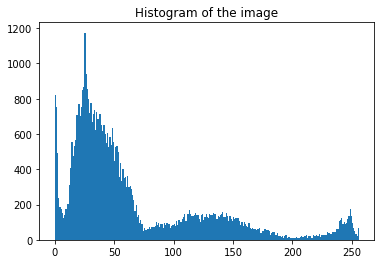

In [11]:
plt.title("Histogram of the image")
plt.hist(img.ravel(),256,[0,256])
plt.show()

<hr>

# IMAGE GRADIENT

An image gradient is a directional change in the intensity or color in an image. Image gradients can be used to extract information from images. Gradient images are created from the original image (generally by convolving with a filter, one of the simplest being the Sobel filter) for this purpose. Each pixel of a gradient image measures the change in intensity of that same point in the original image, in a given direction. To get the full range of direction, gradient images in the x and y directions are computed.

Different lighting or camera properties can cause two images of the same scene to have drastically different pixel values. This can cause matching algorithms to fail to match very similar or identical features. One way to solve this is to compute texture or feature signatures based on gradient images computed from the original images. These gradients are less susceptible to lighting and camera changes, so matching errors are reduced.
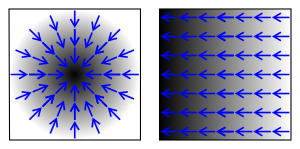

### Calculating the gradient in image

For the function g(x,y) the gradient is the vector (gx,gy), where an image is a discrete function of (x,y)

The direction is given by
![direction.png](https://wikimedia.org/api/rest_v1/media/math/render/svg/432a871380023ae357bd53e546be12b3bb9be107)

And the magnitutde is given by 
![magnitude.png](https://wikimedia.org/api/rest_v1/media/math/render/svg/43d9af79d0c73bc01783b83a8d7f5def0be305e1)

![gradientBlack](https://www.meccanismocomplesso.org/wp-content/uploads/2016/12/opencv-filter-image-theory-2.jpg)
As you can see from the figure, an edge is no more than a quick transition from one hue to another of a color. To simplify, the 0 is black and 1 is white. All shades of gray will be between 0 and 1.

### The calculation of the derivative – The derivative of Shobal and the Laplacian
If you are interested in how you can calculate the derivative of a matrix you can read this section, otherwise you can go directly to the case study below.

The derivative of a matrix is calculated by an operator called the Laplacian, in honor of Laplace, a famous mathematician.
![image.png](https://www.meccanismocomplesso.org/wp-content/ql-cache/quicklatex.com-66fdc1141425d2f9996d4a5281fdb15e_l3.svg)
Unfortunately the partial derivatives can not be solved analytically but must be treated with the numerical calculation using approximations. So if you want to calculate a Laplacian, you will need to calculate first two derivatives, called derivatives of Sobal, each of which takes into account the gradient variations in a certain direction: one horizontal, the other vertical.

**Horizontal derivative of Sobal (Sobal x):** Is obtained through the convolution * The image with a matrix  G_ {x}  kernel call always odd sizes. The simplest case, the one with the size 3 kernel is the following case:

![image.png](https://www.meccanismocomplesso.org/wp-content/ql-cache/quicklatex.com-a9494129602c4ce6b21fa4ca41a2b75c_l3.svg)
**Vertical Sobal derivative (Sobal y):** It is obtained through the convolution * of the image I with a matrix $latex G_{y} $ called kernel which has always odd size. The kernel with size 3 is the simplest case:
![image.png](https://www.meccanismocomplesso.org/wp-content/ql-cache/quicklatex.com-9462d94b95bd4b354496e59545525061_l3.svg)
So in the end to get the Laplacian (approximation) you will need to combine the two previous results
![image.png](https://www.meccanismocomplesso.org/wp-content/ql-cache/quicklatex.com-5196849ba10e72b8e517fde12f958c45_l3.svg)

The lower the size of the kernel, the greater the approximation with which you’ll get the results. But at the same time the larger the size of the kernel the greater the required calculation. For a kernel size 3, however, the approximation can be really excessive, and it is better to use the Scharr function (also available in OpenCV). As for the examples in this article, you will use a size 5 kernel that is a good compromise calculation-approximation.

The Scharr function has these two kernels:
![image.png](https://www.meccanismocomplesso.org/wp-content/ql-cache/quicklatex.com-44d1c3aa52f6f24ff410afd8c1b80cf8_l3.svg)

<br>
<br>
<br>


> A kernel is essentially a fixed size array of numerical coefficeints along with an anchor point in that array, which is tipically located at the center.
![image.png](https://docs.opencv.org/2.4.13.7/_images/filter_2d_tutorial_kernel_theory.png)


### Extracting feature
A feature descriptor is a representation of an image or an image patch that simplifies the image by extracting useful information and throwing away extraneous information.

Typically, a feature descriptor converts an image of size width x height x 3 (channels ) to a feature vector / array of length n. In the case of the HOG feature descriptor, the input image is of size 64 x 128 x 3 and the output feature vector is of length 3780.

### How to calculate Histogram of Oriented Gradients ?

#### Step1: Preprocessing
In the preprocessing step we have to extract the bounding section of the object to find. In this case we should have the faces of the person. Since we will be using only images of the individual person we can assume that preprocessing is taken care.
![image.png](https://www.learnopencv.com/wp-content/uploads/2016/11/hog-preprocessing.jpg)
#### Step 2 : Calculate the Gradient Images
To calculate a HOG descriptor, we need to first calculate the horizontal and vertical gradients; after all, we want to calculate the histogram of gradients. This is easily achieved by filtering the image with the following kernels.
![image.png](https://www.learnopencv.com/wp-content/uploads/2016/11/gradient-kernels.jpg)
The image shows the gradient
![image.png](https://www.learnopencv.com/wp-content/uploads/2016/11/gradients.png)

> The x-gradient fires on vertical lines and the y-gradient fires on horizontal lines. 

The magnitude of gradient fires where ever there is a sharp change in intensity. None of them fire when the region is smooth. The gradient image removed a lot of non-essential information ( e.g. constant colored background ), but highlighted outlines. In other words, you can look at the gradient image and still easily say there is a person in the picture.

At every pixel, the gradient has a magnitude and a direction. For color images, the gradients of the three channels are evaluated ( as shown in the figure above ). The magnitude of gradient at a pixel is the maximum of the magnitude of gradients of the three channels, and the angle is the angle corresponding to the maximum gradient.

#### Step 3 : Calculate Histogram of Gradients in 8×8 cells
In this step, the image is divided into 8×8 cells and a histogram of gradients is calculated for each 8×8 cells.

We will learn about the histograms in a moment, but before we go there let us first understand why we have divided the image into 8×8 cells. One of the important reasons to use a feature descriptor to describe a patch of an image is that it provides a compact representation. An 8×8 image patch contains 8x8x3 = 192 pixel values. The gradient of this patch contains 2 values ( magnitude and direction ) per pixel which adds up to 8x8x2 = 128 numbers. By the end of this section we will see how these 128 numbers are represented using a 9-bin histogram which can be stored as an array of 9 numbers. Not only is the representation more compact, calculating a histogram over a patch makes this represenation more robust to noise. Individual graidents may have noise, but a histogram over 8×8 patch makes the representation much less sensitive to noise.

But why 8×8 patch ? Why not 32×32 ? It is a design choice informed by the scale of features we are looking for. HOG was used for pedestrian detection initially. 8×8 cells in a photo of a pedestrian scaled to 64×128 are big enough to capture interesting features ( e.g. the face, the top of the head etc. ).

Let us look at one 8×8 patch in the image and see how the gradients look.
![image.png](https://www.learnopencv.com/wp-content/uploads/2016/12/hog-cell-gradients-768x432.png)

**Center : The RGB patch and gradients represented using arrows. Right : The gradients in the same patch represented as numbers**

The center is very informative. It shows the patch of the image overlaid with arrows showing the gradient — the arrow shows the direction of gradient and its length shows the magnitude. Notice how the direction of arrows points to the direction of change in intensity and the magnitude shows how big the difference is.

On the right, we see the raw numbers representing the gradients in the 8×8 cells with one minor difference — the angles are between 0 and 180 degrees instead of 0 to 360 degrees. These are called “unsigned” gradients because a gradient and it’s negative are represented by the same numbers. In other words, a gradient arrow and the one 180 degrees opposite to it are considered the same. But, why not use the 0 – 360 degrees ? Empirically it has been shown that unsigned gradients work better than signed gradients for pedestrian detection. Some implementations of HOG will allow you to specify if you want to use signed gradients.

The next step is to create a histogram of gradients in these 8×8 cells. The histogram contains 9 bins corresponding to angles 0, 20, 40 … 160.

The following figure illustrates the process. We are looking at magnitude and direction of the gradient of the same 8×8 patch as in the previous figure. A bin is selected based on the direction, and the vote ( the value that goes into the bin ) is selected based on the magnitude. Let’s first focus on the pixel encircled in blue. It has an angle ( direction ) of 80 degrees and magnitude of 2. So it adds 2 to the 5th bin. The gradient at the pixel encircled using red has an angle of 10 degrees and magnitude of 4. Since 10 degrees is half way between 0 and 20, the vote by the pixel splits evenly into the two bins.

![image.png](https://www.learnopencv.com/wp-content/uploads/2016/12/hog-histogram-1.png)

There is one more detail to be aware of. If the angle is greater than 160 degrees, it is between 160 and 180, and we know the angle wraps around making 0 and 180 equivalent. So in the example below, the pixel with angle 165 degrees contributes proportionally to the 0 degree bin and the 160 degree bin.
![image.png](https://www.learnopencv.com/wp-content/uploads/2016/12/hog-histogram-2.png)
The contributions of all the pixels in the 8×8 cells are added up to create the 9-bin histogram. For the patch above, it looks like this
![image.png](https://www.learnopencv.com/wp-content/uploads/2016/12/histogram-8x8-cell.png)

In our representation, the y-axis is 0 degrees. You can see the histogram has a lot of weight near 0 and 180 degrees, which is just another way of saying that in the patch gradients are pointing either up or down

#### Step 4 : 16×16 Block Normalization

In the previous step, we created a histogram based on the gradient of the image. Gradients of an image are sensitive to overall lighting. If you make the image darker by dividing all pixel values by 2, the gradient magnitude will change by half, and therefore the histogram values will change by half. Ideally, we want our descriptor to be independent of lighting variations. In other words, we would like to “normalize” the histogram so they are not affected by lighting variations.

Before I explain how the histogram is normalized, let’s see how a vector of length 3 is normalized.

Let’s say we have an RGB color vector [ 128, 64, 32 ]. The length of this vector is \sqrt{128^2 + 64^2 + 32^2} = 146.64. This is also called the L2 norm of the vector. Dividing each element of this vector by 146.64 gives us a normalized vector [0.87, 0.43, 0.22]. Now consider another vector in which the elements are twice the value of the first vector 2 x [ 128, 64, 32 ] = [ 256, 128, 64 ]. You can work it out yourself to see that normalizing [ 256, 128, 64 ] will result in [0.87, 0.43, 0.22], which is the same as the normalized version of the original RGB vector. You can see that normalizing a vector removes the scale.

Now that we know how to normalize a vector, you may be tempted to think that while calculating HOG you can simply normalize the 9×1 histogram the same way we normalized the 3×1 vector above. It is not a bad idea, but a better idea is to normalize over a bigger sized block of 16×16. A 16×16 block has 4 histograms which can be concatenated to form a 36 x 1 element vector and it can be normalized just the way a 3×1 vector is normalized. The window is then moved by 8 pixels ( see animation ) and a normalized 36×1 vector is calculated over this window and the process is repeated.

![image.png](https://www.learnopencv.com/wp-content/uploads/2016/12/hog-16x16-block-normalization.gif)

#### Step 5 : Calculate the HOG feature vector

To calculate the final feature vector for the entire image patch, the 36×1 vectors are concatenated into one giant vector. What is the size of this vector ? Let us calculate

* How many positions of the 16×16 blocks do we have ? There are 7 horizontal and 15 vertical positions making a total of 7 x 15 = 105 positions.
* Each 16×16 block is represented by a 36×1 vector. So when we concatenate them all into one gaint vector we obtain a 36×105 = 3780 dimensional vector.

**Visualizing Histogram of Oriented Gradients**
The HOG descriptor of an image patch is usually visualized by plotting the 9×1 normalized histograms in the 8×8 cells. See image on the side. You will notice that dominant direction of the histogram captures the shape of the person, especially around the torso and legs
![image.png](https://www.learnopencv.com/wp-content/uploads/2016/12/hog-visualization.png)